In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    i=0
    while i<len(lines):
        g=lines[i]
        temp=g.split("-")
        types.append(temp[0])
        estops.append(temp[1])
        pre_thres.append(temp[2])
        rec_thres.append(temp[3])
        split.append(temp[4])
        i+=2
        acc.append(float(lines[i])*100)
        i+=1
        f1.append(float(lines[i])*100)
        i+=1
        pre.append(float(lines[i])*100)
        i+=1
        rec.append(float(lines[i])*100)
        i+=1
        j+=1
        i+=1
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,
                       'split':split,'accuracy':acc,
                       'precision':pre,'recall':rec,
                        'f1_score':f1})
    return Results

In [4]:
Results_1=get_report("/Users/adithyabandi/AllExecutionI.csv")
Results_1["instances_sorted"]=True
Results_2=get_report("/Users/adithyabandi/AllExecutionIII.csv")
Results_2["instances_sorted"]=False

In [5]:
Results=pd.concat([Results_1,Results_2])

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(object_Results_grouped.mean().sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as False
With Early Stop set as False
rgb results:


accuracy  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  50            25             93.125000   
                                               50             89.097222   
                                 25            25             90.388889   
                                 75            50             81.659722   
                                 90            50             80.868056   
                                 75            25             82.520833   
                                 25            50             84.847222   
                                 90            25             77.069444   
                                 75            75             72.375000   
                                 50            75             72.145833   
                                 25            75             73.000000   
                                 90            75             64.673611   
                                 50            90             63.916667   
                                 90            90             57.173611   
                                 25            90             55.298611   
                                 75            90             47.388889   

                                                               f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  50            25             89.433532   
                                               50             88.193452   
                                 25            25             87.922619   
                                 75            50             83.050595   
                                 90            50             82.585317   
                                 75            25             82.270833   
                                 25            50             81.646825   
                                 90            25             79.468254   
                                 75            75             73.438492   
                                 50            75             73.313492   
                                 25            75             71.855159   
                                 90            75             65.936508   
                                 50            90             64.973214   
                                 90            90             59.381944   
                                 25            90             54.872024   
                                 75            90             47.651786   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  50            25             90.875000   
                                               50             89.437500   
                                 25            25             88.256944   
                                 75            50             78.916667   
                                 90            50             77.951389   
                                 75            25             81.000000   
                                 25            50             84.965278   
                                 90            25             73.152778   
                                 75            75             69.715278   
                                 50            75             70.159722   
                                 25            75             71.750000   
                                 90            75             60.201389   
                                 50            90             61.486111   
                                 90            90             53.388889   
                                 25            90             51.375000   
                                 75            90             42.062500   

          

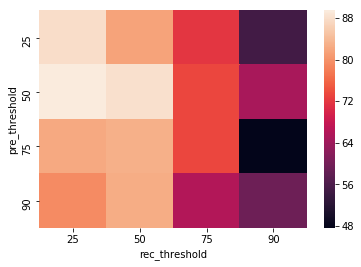

With instances sorted as False
With Early Stop set as False
shape results:


accuracy  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 25            25             80.275000   
                                  75            50             81.558333   
                                  50            25             84.691667   
                                                50             81.950000   
                                  90            50             78.958333   
                                  50            75             76.033333   
                                  75            75             80.025000   
                                  25            50             82.125000   
                                                90             73.950000   
                                                75             79.900000   
                                  50            90             71.558333   
                                  75            25             77.266667   
                                  90            25             73.400000   
                                                90             70.741667   
                                  75            90             73.641667   
                                  90            75             67.008333   

                                                                f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 25            25             74.983333   
                                  75            50             74.109524   
                                  50            25             74.033333   
                                                50             73.611905   
                                  90            50             72.960714   
                                  50            75             72.385714   
                                  75            75             70.973810   
                                  25            50             70.550000   
                                                90             70.516667   
                                                75             69.791667   
                                  50            90             69.466667   
                                  75            25             69.260714   
                                  90            25             68.422619   
                                                90             67.178571   
                                  75            90             65.642857   
                                  90            75             64.929762   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 25            25             84.916667   
                                  75            50             83.741667   
                                  50            25             82.916667   
                                                50             85.708333   
                                  90            50             76.533333   
                                  50            75             79.741667   
                                  75            75             79.666667   
                                  25            50             82.250000   
                                                90             72.708333   
                                                75             78.841667   
                                  50            90             72.633333   
                                  75            25             79.808333   
                                  90            25             68.675000   
                                                90             68.958333   
                                  75            90             67.666667   
                                  

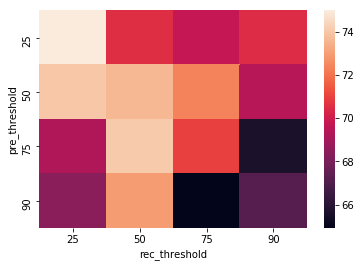

With instances sorted as False
With Early Stop set as False
object results:


accuracy  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             81.179688   
                                                 25             77.411458   
                                                 90             73.268229   
                                                 75             77.252604   
                                   25            25             80.820312   
                                   75            90             74.169271   
                                   25            50             80.169271   
                                   50            25             80.325521   
                                                 90             72.104167   
                                   25            90             75.322917   
                                   75            50             79.080729   
                                   50            50             79.625000   
                                   25            75             79.567708   
                                   75            25             79.169271   
                                                 75             77.604167   
                                   50            75             76.377604   

                                                                 f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             73.647693   
                                                 25             69.673735   
                                                 90             69.616071   
                                                 75             69.259301   
                                   25            25             66.661458   
                                   75            90             66.514509   
                                   25            50             66.481399   
                                   50            25             66.241815   
                                                 90             65.658482   
                                   25            90             65.403646   
                                   75            50             65.230655   
                                   50            50             65.154762   
                                   25            75             64.872024   
                                   75            25             64.705357   
                                                 75             64.342634   
                                   50            75             62.856771   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             77.820312   
                                                 25             73.989583   
                                                 90             72.924479   
                                                 75             74.820312   
                                   25            25             77.630208   
                                   75            90             74.981771   
                                   25            50             77.135417   
                                   50            25             76.119792   
                                                 90             71.161458   
                                   25            90             71.960938   
                                   75            50             74.882812   
                                   50            50             77.044271   
                                   25            75             74.992188   
                                   75            25             73.119792   
                                                 75        

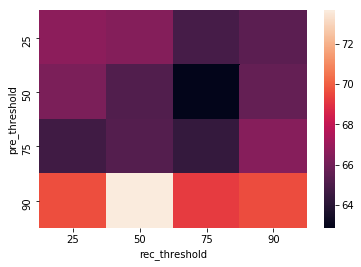

With instances sorted as False
With Early Stop set as True
rgb results:


accuracy  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             92.493056   
                                 25            25             91.875000   
                                               50             90.701389   
                                 75            50             83.812500   
                                 50            50             84.319444   
                                 90            50             81.902778   
                                               25             81.173611   
                                 75            25             79.034722   
                                 25            75             71.055556   
                                 50            90             67.715278   
                                 75            75             65.972222   
                                 25            90             64.263889   
                                 50            75             61.708333   
                                 90            75             58.854167   
                                               90             52.625000   
                                 75            90             43.979167   

                                                               f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             89.871032   
                                 25            25             89.755952   
                                               50             88.378968   
                                 75            50             85.612103   
                                 50            50             83.615079   
                                 90            50             82.826389   
                                               25             80.821429   
                                 75            25             79.654762   
                                 25            75             68.926587   
                                 50            90             67.657738   
                                 75            75             66.889881   
                                 25            90             62.875992   
                                 50            75             62.488095   
                                 90            75             59.720238   
                                               90             54.674603   
                                 75            90             45.050595   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             91.645833   
                                 25            25             93.104167   
                                               50             91.326389   
                                 75            50             82.819444   
                                 50            50             84.472222   
                                 90            50             76.319444   
                                               25             73.736111   
                                 75            25             75.986111   
                                 25            75             66.777778   
                                 50            90             65.659722   
                                 75            75             65.208333   
                                 25            90             60.645833   
                                 50            75             59.243056   
                                 90            75             54.166667   
                                               90             47.416667   
                                 75            90             41.708333   

          

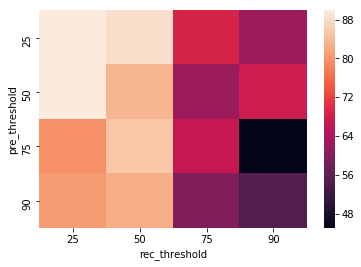

With instances sorted as False
With Early Stop set as True
shape results:


accuracy  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 75            25             85.158333   
                                                75             86.125000   
                                  50            25             85.900000   
                                                75             85.000000   
                                                50             81.983333   
                                  75            50             80.433333   
                                  25            50             84.375000   
                                  90            90             73.858333   
                                                75             72.308333   
                                  25            25             80.725000   
                                                75             81.408333   
                                                90             74.766667   
                                  90            25             75.900000   
                                  75            90             72.316667   
                                  50            90             72.825000   
                                  90            50             74.208333   

                                                                f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 75            25             78.215476   
                                                75             78.161905   
                                  50            25             76.183333   
                                                75             75.328571   
                                                50             74.850000   
                                  75            50             74.476190   
                                  25            50             73.633333   
                                  90            90             72.046429   
                                                75             71.927381   
                                  25            25             70.866667   
                                                75             70.783333   
                                                90             70.553571   
                                  90            25             69.708333   
                                  75            90             69.557143   
                                  50            90             69.364286   
                                  90            50             69.166667   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 75            25             84.966667   
                                                75             85.375000   
                                  50            25             84.000000   
                                                75             84.041667   
                                                50             83.333333   
                                  75            50             82.016667   
                                  25            50             83.750000   
                                  90            90             73.433333   
                                                75             70.941667   
                                  25            25             80.833333   
                                                75             82.750000   
                                                90             73.133333   
                                  90            25             72.183333   
                                  75            90             73.491667   
                                  50            90             68.483333   
                                  

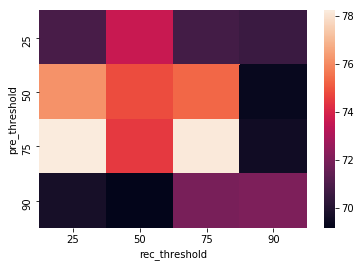

With instances sorted as False
With Early Stop set as True
object results:


accuracy  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            50             79.789062   
                                                 25             76.083333   
                                                 75             75.450521   
                                   75            75             79.421875   
                                   25            50             80.778646   
                                                 75             81.476562   
                                   75            90             74.000000   
                                                 50             80.153646   
                                   50            50             80.046875   
                                                 25             79.489583   
                                   75            25             79.411458   
                                   25            25             80.458333   
                                   50            90             74.052083   
                                                 75             77.182292   
                                   25            90             72.848958   
                                   90            90             67.976562   

                                                                 f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            50             71.761533   
                                                 25             70.479167   
                                                 75             69.107887   
                                   75            75             67.246280   
                                   25            50             66.565476   
                                                 75             66.409970   
                                   75            90             66.358259   
                                                 50             66.097098   
                                   50            50             65.936012   
                                                 25             65.597470   
                                   75            25             65.561756   
                                   25            25             65.311012   
                                   50            90             65.094866   
                                                 75             64.597098   
                                   25            90             63.159970   
                                   90            90             62.022693   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            50             77.338542   
                                                 25             74.677083   
                                                 75             73.455729   
                                   75            75             77.760417   
                                   25            50             76.679688   
                                                 75             75.716146   
                                   75            90             74.453125   
                                                 50             75.653646   
                                   50            50             76.809896   
                                                 25             76.263021   
                                   75            25             76.223958   
                                   25            25             75.299479   
                                   50            90             71.708333   
                                                 75             73.617188   
                                   25            90        

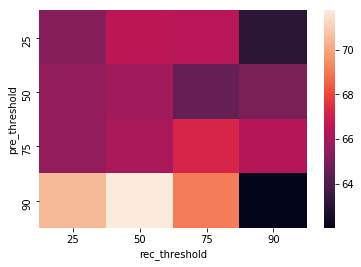

With instances sorted as True
With Early Stop set as False
rgb results:


accuracy  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  50            50             91.993056   
                                               25             92.979167   
                                 25            50             91.625000   
                                               25             91.569444   
                                 75            50             81.555556   
                                               25             81.243056   
                                 50            75             78.388889   
                                 90            50             74.722222   
                                 25            75             77.395833   
                                 90            25             72.319444   
                                 50            90             72.409722   
                                 25            90             72.569444   
                                 75            75             70.333333   
                                               90             62.090278   
                                 90            75             59.152778   
                                               90             58.090278   

                                                               f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  50            50             90.219246   
                                               25             89.434524   
                                 25            50             88.561508   
                                               25             87.580357   
                                 75            50             83.516865   
                                               25             82.431548   
                                 50            75             77.899802   
                                 90            50             77.855159   
                                 25            75             76.275794   
                                 90            25             75.783730   
                                 50            90             72.342262   
                                 25            90             72.242063   
                                 75            75             71.348214   
                                               90             63.640873   
                                 90            75             62.494048   
                                               90             60.965278   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  50            50             92.090278   
                                               25             91.930556   
                                 25            50             91.062500   
                                               25             88.805556   
                                 75            50             77.743056   
                                               25             76.993056   
                                 50            75             77.090278   
                                 90            50             71.395833   
                                 25            75             76.145833   
                                 90            25             67.069444   
                                 50            90             70.375000   
                                 25            90             71.666667   
                                 75            75             67.520833   
                                               90             58.937500   
                                 90            75             55.458333   
                                               90             54.909722   

          

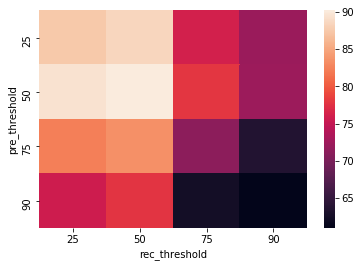

With instances sorted as True
With Early Stop set as False
shape results:


accuracy  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            75             85.766667   
                                                50             85.683333   
                                                25             86.608333   
                                  50            75             82.391667   
                                  25            50             84.100000   
                                                25             85.041667   
                                  50            50             82.025000   
                                                25             83.133333   
                                  90            50             73.683333   
                                  25            75             82.725000   
                                  50            90             73.025000   
                                  90            75             74.250000   
                                  75            90             71.891667   
                                  90            25             68.133333   
                                                90             63.825000   
                                  25            90             70.041667   

                                                                f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            75             78.661905   
                                                50             77.078571   
                                                25             76.633333   
                                  50            75             76.550000   
                                  25            50             75.407143   
                                                25             75.083333   
                                  50            50             75.033333   
                                                25             73.666667   
                                  90            50             72.480952   
                                  25            75             72.428571   
                                  50            90             70.407143   
                                  90            75             69.834524   
                                  75            90             67.154762   
                                  90            25             67.107143   
                                                90             65.883333   
                                  25            90             65.266667   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            75             89.208333   
                                                50             86.458333   
                                                25             85.333333   
                                  50            75             86.416667   
                                  25            50             86.000000   
                                                25             84.083333   
                                  50            50             86.666667   
                                                25             84.583333   
                                  90            50             73.650000   
                                  25            75             83.791667   
                                  50            90             72.816667   
                                  90            75             69.200000   
                                  75            90             68.408333   
                                  90            25             66.441667   
                                                90             63.041667   
                                  

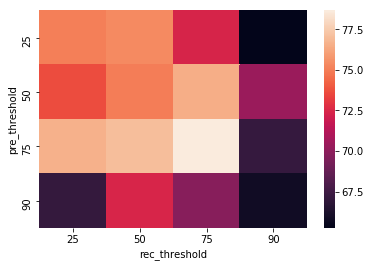

With instances sorted as True
With Early Stop set as False
object results:


accuracy  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            25             79.026042   
                                                 90             75.354167   
                                                 75             75.770833   
                                                 50             77.002604   
                                   50            90             79.841146   
                                   75            90             77.979167   
                                   25            50             80.015625   
                                   75            25             80.572917   
                                   25            75             79.690104   
                                   75            75             78.617188   
                                   25            25             80.460938   
                                   75            50             78.289062   
                                   50            50             80.539062   
                                   25            90             78.205729   
                                   50            25             80.075521   
                                                 75             78.997396   

                                                                 f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            25             69.426711   
                                                 90             67.765253   
                                                 75             67.098958   
                                                 50             67.029390   
                                   50            90             66.802827   
                                   75            90             66.345982   
                                   25            50             66.340030   
                                   75            25             66.078125   
                                   25            75             66.074033   
                                   75            75             65.828125   
                                   25            25             65.735119   
                                   75            50             65.425595   
                                   50            50             65.101190   
                                   25            90             64.684896   
                                   50            25             64.623512   
                                                 75             64.587054   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            25             77.169271   
                                                 90             73.979167   
                                                 75             75.169271   
                                                 50             74.614583   
                                   50            90             75.075521   
                                   75            90             75.307292   
                                   25            50             76.666667   
                                   75            25             76.250000   
                                   25            75             76.161458   
                                   75            75             76.041667   
                                   25            25             75.950521   
                                   75            50             77.070312   
                                   50            50             74.296875   
                                   25            90             73.549479   
                                   50            25        

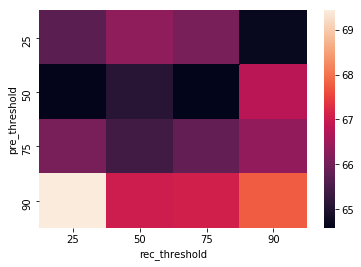

With instances sorted as True
With Early Stop set as True
rgb results:


accuracy  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             91.520833   
                                               50             92.972222   
                                 25            25             91.194444   
                                               50             90.187500   
                                 75            50             83.875000   
                                               25             83.444444   
                                 25            75             78.201389   
                                 90            25             73.673611   
                                               50             74.069444   
                                 50            75             77.451389   
                                               90             70.826389   
                                 75            75             68.347222   
                                 25            90             69.479167   
                                 75            90             62.631944   
                                 90            75             61.097222   
                                               90             57.625000   

                                                               f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             89.622024   
                                               50             89.426587   
                                 25            25             88.494048   
                                               50             87.000992   
                                 75            50             85.859127   
                                               25             82.979167   
                                 25            75             78.188492   
                                 90            25             77.274802   
                                               50             77.269841   
                                 50            75             76.612103   
                                               90             70.894841   
                                 75            75             70.042659   
                                 25            90             69.139881   
                                 75            90             64.362103   
                                 90            75             63.936508   
                                               90             60.620040   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             91.791667   
                                               50             91.625000   
                                 25            25             90.500000   
                                               50             88.826389   
                                 75            50             82.381944   
                                               25             77.215278   
                                 25            75             77.444444   
                                 90            25             69.527778   
                                               50             68.791667   
                                 50            75             75.840278   
                                               90             69.034722   
                                 75            75             65.527778   
                                 25            90             66.215278   
                                 75            90             59.583333   
                                 90            75             57.131944   
                                               90             53.722222   

          

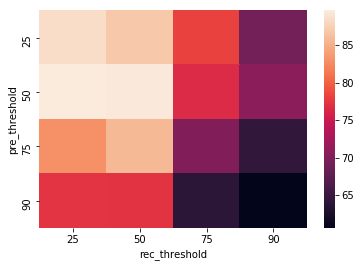

With instances sorted as True
With Early Stop set as True
shape results:


accuracy  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 75            25             86.525000   
                                  50            75             84.283333   
                                  75            75             83.058333   
                                  50            25             81.891667   
                                  75            50             85.925000   
                                  25            50             84.641667   
                                                75             81.883333   
                                                25             81.750000   
                                  90            25             74.383333   
                                                50             71.225000   
                                                75             73.375000   
                                  50            50             82.916667   
                                                90             71.991667   
                                  90            90             67.450000   
                                  75            90             72.850000   
                                  25            90             69.600000   

                                                                f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 75            25             78.100000   
                                  50            75             77.483333   
                                  75            75             76.445238   
                                  50            25             76.400000   
                                  75            50             75.933333   
                                  25            50             75.450000   
                                                75             74.195238   
                                                25             73.250000   
                                  90            25             72.408333   
                                                50             71.775000   
                                                75             71.753571   
                                  50            50             71.166667   
                                                90             68.253571   
                                  90            90             66.989286   
                                  75            90             66.734524   
                                  25            90             64.813095   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 75            25             87.250000   
                                  50            75             88.750000   
                                  75            75             83.875000   
                                  50            25             87.333333   
                                  75            50             85.833333   
                                  25            50             86.166667   
                                                75             82.291667   
                                                25             83.583333   
                                  90            25             72.300000   
                                                50             70.850000   
                                                75             72.350000   
                                  50            50             79.916667   
                                                90             69.791667   
                                  90            90             65.033333   
                                  75            90             68.141667   
                                  

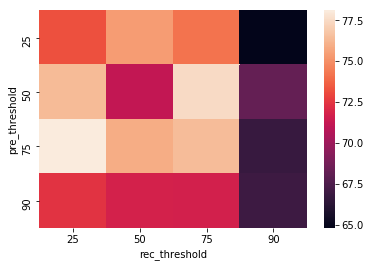

With instances sorted as True
With Early Stop set as True
object results:


accuracy  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            25             76.929688   
                                                 75             77.682292   
                                   50            50             81.729167   
                                   90            90             76.320313   
                                   25            50             79.395833   
                                   50            90             78.148438   
                                   90            50             76.489583   
                                   75            50             79.835938   
                                   25            25             79.533854   
                                   75            90             77.544271   
                                   25            90             79.218750   
                                   50            25             80.026042   
                                   75            25             80.723958   
                                   50            75             79.158854   
                                   75            75             78.367188   
                                   25            75             78.614583   

                                                                 f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            25             67.404018   
                                                 75             67.137277   
                                   50            50             66.620536   
                                   90            90             66.203869   
                                   25            50             65.984375   
                                   50            90             65.962798   
                                   90            50             65.852679   
                                   75            50             65.783482   
                                   25            25             65.727679   
                                   75            90             65.536086   
                                   25            90             65.484375   
                                   50            25             65.278274   
                                   75            25             65.253720   
                                   50            75             65.081845   
                                   75            75             64.097470   
                                   25            75             63.991815   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            25             74.445312   
                                                 75             73.760417   
                                   50            50             76.835938   
                                   90            90             73.195312   
                                   25            50             76.328125   
                                   50            90             74.973958   
                                   90            50             71.979167   
                                   75            50             75.364583   
                                   25            25             77.122396   
                                   75            90             74.953125   
                                   25            90             73.078125   
                                   50            25             75.416667   
                                   75            25             75.039062   
                                   50            75             73.828125   
                                   75            75        

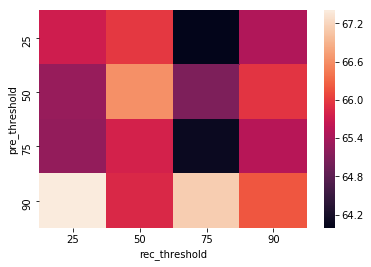

In [7]:
feature_types=["rgb","shape","object"]
early_stops=["False","True"]
instance_sorts=[False,True]
for instance_sort in instance_sorts:
    for early_stop in early_stops:
        for feature_type in feature_types:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)